In [84]:
import numpy as np
from data import load_data
from evaluate import qwk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [85]:
# Load Data
X_train, y_train, X_test, y_test, X_predict = load_data()

# PCA Decomposition
pca = PCA(svd_solver='full')
pcaX_train = pca.fit_transform(X_train)
pcaX_test = pca.transform(X_test)

# Select K Best
kb = SelectKBest()
kbX_train = kb.fit_transform(X_train, y_train)
kbX_test = kb.transform(X_test)

# Variance Threshold
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))
vtX_train = vt.fit_transform(X_train, y_train)
vtX_test = vt.transform(X_test)

print(f'Training = {X_train.shape}')
print(f'Testing = {X_test.shape}')

Training = (10495, 361)
Testing = (4498, 361)


c:\Users\Noah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  8  16  45  48  64  66  72 110 133 144 158 168 172 186 196 202 217 231
 234 247 248 253 274 291 298 300] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Noah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


---------- KNN Classifier ----------


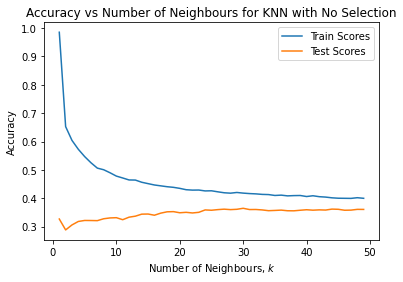

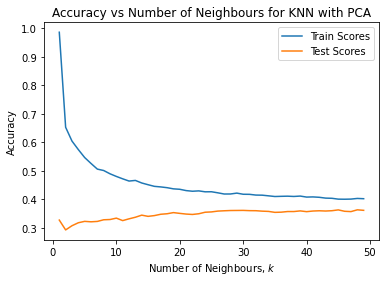

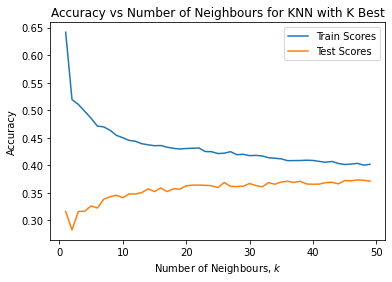

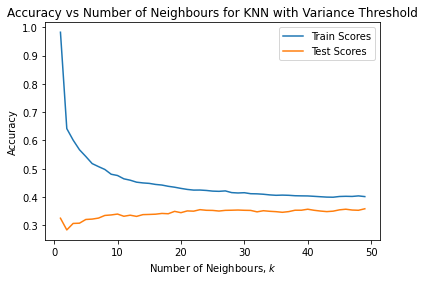

In [86]:
# KNN Classifier
print('---------- KNN Classifier ----------')

dataLabels = ['No Selection', 'PCA', 'K Best', 'Variance Threshold']
data = [(X_train, X_test), (pcaX_train, pcaX_test), (kbX_train, kbX_test), (vtX_train, vtX_test)]
kk = range(1, 50)

for i, label in enumerate(dataLabels):
    xtrain, xtest = data[i]
    
    trainScores = []
    testScores = []
    for k in kk:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(xtrain, y_train)
        trainScores.append(knn.score(xtrain, y_train))
        testScores.append(knn.score(xtest, y_test))

    plt.plot(kk, trainScores, label='Train Scores')
    plt.plot(kk, testScores, label='Test Scores')
    plt.title(f'Accuracy vs Number of Neighbours for KNN with {label}')
    plt.xlabel('Number of Neighbours, $k$')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
    
    
# print(f'Train Accuracy: {knn.score(X_train, y_train)}')
# print(f'Testing Accuracy: {knn.score(X_test, y_test)}')
# y_pred = knn.predict(X_test)
# print(qwk(y_test, y_pred))
# print(classification_report(y_test, y_pred))



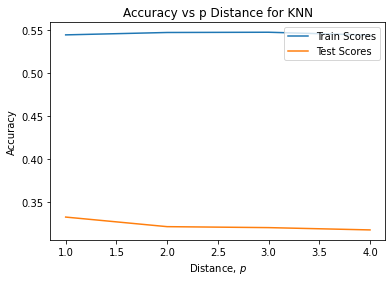

In [87]:
# Vary distance, p
ps = range(1, 5)

trainScores = []
testScores = []
for p in ps:
    knn = KNeighborsClassifier(p=p)
    knn.fit(X_train, y_train)
    trainScores.append(knn.score(X_train, y_train))
    testScores.append(knn.score(X_test, y_test))

plt.plot(ps, trainScores, label='Train Scores')
plt.plot(ps, testScores, label='Test Scores')
plt.title(f'Accuracy vs p Distance for KNN')
plt.xlabel('Distance, $p$')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

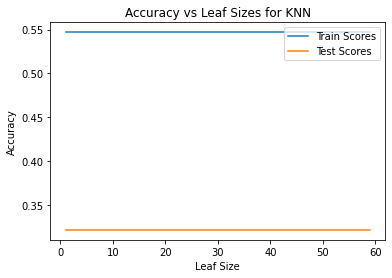

In [92]:
# Vary Leaf sizes
leafSizes = range(1, 60)

trainScores = []
testScores = []
for l in leafSizes:
    knn = KNeighborsClassifier(leaf_size=l)
    knn.fit(X_train, y_train)
    trainScores.append(knn.score(X_train, y_train))
    testScores.append(knn.score(X_test, y_test))

plt.plot(leafSizes, trainScores, label='Train Scores')
plt.plot(leafSizes, testScores, label='Test Scores')
plt.title(f'Accuracy vs Leaf Sizes for KNN')
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

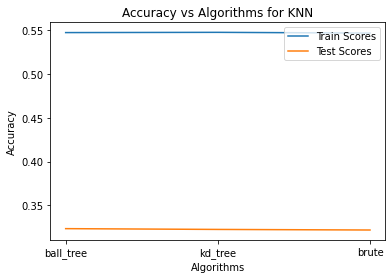

In [90]:
# Vary Algorithms
algorithms = ('ball_tree', 'kd_tree', 'brute')

trainScores = []
testScores = []
for a in algorithms:
    knn = KNeighborsClassifier(algorithm=a)
    knn.fit(X_train, y_train)
    trainScores.append(knn.score(X_train, y_train))
    testScores.append(knn.score(X_test, y_test))

plt.plot(algorithms, trainScores, label='Train Scores')
plt.plot(algorithms, testScores, label='Test Scores')
plt.title(f'Accuracy vs Algorithms for KNN')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

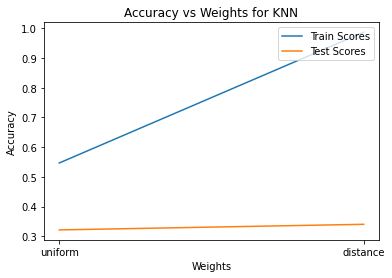

In [91]:
# Vary weights
weights = ('uniform', 'distance')

trainScores = []
testScores = []
for w in weights:
    knn = KNeighborsClassifier(weights=w)
    knn.fit(X_train, y_train)
    trainScores.append(knn.score(X_train, y_train))
    testScores.append(knn.score(X_test, y_test))

plt.plot(weights, trainScores, label='Train Scores')
plt.plot(weights, testScores, label='Test Scores')
plt.title(f'Accuracy vs Weights for KNN')
plt.xlabel('Weights')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

In [93]:
# Best parameters

xtrain = pcaX_train
xtest = pcaX_test

knn = KNeighborsClassifier(n_neighbors=50, p=1, weights='distance')
knn.fit(xtrain, y_train)
print(f'Train Accuracy: {knn.score(xtrain, y_train)}')
print(f'Testing Accuracy: {knn.score(xtest, y_test)}')

# plt.plot(kk, trainScores, label='Train Scores')
# plt.plot(kk, testScores, label='Test Scores')
# plt.title(f'Accuracy vs Number of Neighbours for KNN with {label}')
# plt.xlabel('Number of Neighbours, $k$')
# plt.ylabel('Accuracy')
# plt.legend(loc='upper right')
# plt.show()
    
    
# y_pred = knn.predict(X_test)
# print(qwk(y_test, y_pred))
# print(classification_report(y_test, y_pred))


Train Accuracy: 0.9874225821819914
Testing Accuracy: 0.36260560248999557
